###### In the first part we clean given datasets and gather additional informatil with help of Tweepy 

In [162]:
#importing necessary libraries
import pandas as pd
import numpy as np
import tweepy 
import json 
import seaborn as sn
import matplotlib.pyplot as plt

%matplotlib inline

#### Gather

In [28]:
#reading the provided text files
dfa = pd.read_csv('twitter-archive-enhanced.csv')
dfi = pd.read_csv('image-predictions.tsv', sep="\t")

In [29]:
#accessing Tweepy
auth = tweepy.OAuthHandler("CZp66HnDRantR9JSTV3clnJtd", "YxthnSWaiknKVULBBCn09k6cl2oWYBJxV2tVMkdyzqMBoPMqKe")
auth.set_access_token("1064744007807361024-jlgLIkss70glbov2IR52i0iyzRaxwK", "s6N5GtOShEJIY3OrsZC3YDl7dA17hW60lC9l90lQ3EwTi")

api = tweepy.API(auth,  wait_on_rate_limit=True)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

In [30]:
#gathering additional twitter informaiton into the text file

def has_picture(entities):
    try: 
        for media in entities['media']:  #to fullfill the requirement of the task, we will 
            if media['type'] == 'photo':  #check the 'media' tag to know if it has picture
                return True
        return False 
    except KeyError:
        return False

In [31]:
id_list = dfa.tweet_id.tolist() #get the list of tweets_id from the archive 

In [32]:
dft = []
error_id = []
for id in id_list:
    try: 
        tweet = api.get_status(id, tweet_mode = 'extended')
    except:
        error_id.append({'tweet_id': tweet.id})
        continue

    dft.append({'tweet_id': tweet.id, 
             'retweets': tweet.retweet_count, 
             'likes': tweet.favorite_count,
             'retweeted': "retweeted_status" in tweet._json,  
             'has_photo': has_picture(tweet.entities)})
    
    with open('json.txt', 'w') as outfile:  
        json.dump(dft, outfile)

### Assess

### assesment of twitter archive dataset

In [33]:
dfa.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### the cleaness issues we can easily identify from info is type of variable:
#### 'tweet_id' - should be str instead of int
##### 'timestamp' - should be datetime instead of object(str), 
##### 'in_reply_to_status_id' - should be str type
##### 'in_reply_to_user_id - should be str type

In [34]:
dfa.duplicated().sum() #cheking if there are any duplicates

0

In [35]:
dfa.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1243,711968124745228288,NaN,NaN,2016-03-21 17:30:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He's trapped in a cup of coffee....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711968124...,10,10,Winston,None,None,pupper,None
520,810254108431155201,NaN,NaN,2016-12-17 22:43:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Gus. He likes to be close to you, whic...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/810254108...,12,10,Gus,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
153,862457590147678208,NaN,NaN,2017-05-11 00:01:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Jersey. He likes to watch movies, but ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/862457590...,13,10,Jersey,None,None,None,None
1295,707983188426153984,7.079801e+17,2.319108e+09,2016-03-10 17:35:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@serial @MrRoles OH MY GOD I listened to all o...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
892,759447681597108224,NaN,NaN,2016-07-30 17:56:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He has no idea what happened h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759447681...,11,10,Oakley,None,None,None,None
1921,674262580978937856,NaN,NaN,2015-12-08 16:21:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's super stoked about being an ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674262580...,9,10,Gus,None,None,pupper,None
1516,690959652130045952,NaN,NaN,2016-01-23 18:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This golden is happy to refute the soft mouth ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690959652...,11,10,None,None,None,None,None
529,808344865868283904,NaN,NaN,2016-12-12 16:16:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Seamus. He's very bad at entering pool...,NaN,NaN,NaN,https://vine.co/v/5QWd3LZqXxd,11,10,Seamus,None,None,None,None


##### the issues we can see from the sample are "None" for the names - should be replaced by NaN;
##### if 'in reply to status ID' has information, the tweet is a retweet and thus not original so shall be removed (according to the requirement of the task)
##### 'dog stage' reveals tidiness issue - all of the stages should be in one column

In [36]:
dfa.rating_numerator.nunique() # considering rating system 40 unique numerators looks like way 
                              # too many 

40

In [37]:
dfa.rating_numerator.value_counts() # from the several checked tweets 17 seems to be the highest 
                                   # numerator

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

##### we can see that not all values of numarators and denominators are right, however, as we are going to unite few datasets, we can assess this issue later on 

##### quick check of the account shows that so far 14 is the highest rating and in total we have 28 cases which seem to be wrong   

In [38]:
dfa.query('rating_numerator > 14').info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 55 to 2074
Data columns (total 17 columns):
tweet_id                      28 non-null int64
in_reply_to_status_id         8 non-null float64
in_reply_to_user_id           8 non-null float64
timestamp                     28 non-null object
source                        28 non-null object
text                          28 non-null object
retweeted_status_id           2 non-null float64
retweeted_status_user_id      2 non-null float64
retweeted_status_timestamp    2 non-null object
expanded_urls                 21 non-null object
rating_numerator              28 non-null int64
rating_denominator            28 non-null int64
name                          28 non-null object
doggo                         28 non-null object
floofer                       28 non-null object
pupper                        28 non-null object
puppo                         28 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 3.9+ KB


In [39]:
dfa.query('rating_numerator > 14')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [40]:
dfa.iloc[313].text #in some of them information can be extracted from the text

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [41]:
dfa.iloc[291].text

'@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10'

In [42]:
dfa.iloc[1712].text

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

##### so there are in total 28 numerators which are higher than 14 and after checking few we can conclude there is no clear pattern - we will need few different methods to get the right numbers.

In [43]:
dfa.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [44]:
dfa.query('rating_denominator > 10').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 342 to 1843
Data columns (total 17 columns):
tweet_id                      20 non-null int64
in_reply_to_status_id         4 non-null float64
in_reply_to_user_id           4 non-null float64
timestamp                     20 non-null object
source                        20 non-null object
text                          20 non-null object
retweeted_status_id           1 non-null float64
retweeted_status_user_id      1 non-null float64
retweeted_status_timestamp    1 non-null object
expanded_urls                 17 non-null object
rating_numerator              20 non-null int64
rating_denominator            20 non-null int64
name                          20 non-null object
doggo                         20 non-null object
floofer                       20 non-null object
pupper                        20 non-null object
puppo                         20 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 2.8+ KB


#### rating denominator however is always 10 so simple way would be to just replace all numbers more than 10 for 10,  however if we calculate the rating what we are looking for number which is below 1.4

In [45]:
dfa.name.describe()

count     2356
unique     957
top       None
freq       745
Name: name, dtype: object

In [46]:
dfa.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
the             8
Sadie           8
Bailey          7
Daisy           7
an              7
Toby            7
Buddy           7
Koda            6
Jax             6
Leo             6
Rusty           6
Scout           6
Oscar           6
Jack            6
Bella           6
Milo            6
Dave            6
Stanley         6
Chester         5
             ... 
Laika           1
Scott           1
Robin           1
Walker          1
Daniel          1
Tug             1
Mollie          1
Dido            1
Harrison        1
Lilah           1
Tiger           1
Einstein        1
Trigger         1
Lilli           1
Apollo          1
Remy            1
Bayley          1
Meera           1
Sweet           1
Biden           1
Willem          1
Eriq            1
Ralphy          1
incredibly      1
Swagger   

In [47]:
dfa.query('name == "None"').info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 5 to 2355
Data columns (total 17 columns):
tweet_id                      745 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     745 non-null object
source                        745 non-null object
text                          745 non-null object
retweeted_status_id           65 non-null float64
retweeted_status_user_id      65 non-null float64
retweeted_status_timestamp    65 non-null object
expanded_urls                 686 non-null object
rating_numerator              745 non-null int64
rating_denominator            745 non-null int64
name                          745 non-null object
doggo                         745 non-null object
floofer                       745 non-null object
pupper                        745 non-null object
puppo                         745 non-null object
dtypes: float64(4), int64(3), object(10)
memory 

#### here is another issue to fix - None and weird names such 'a'  shall be replaced by NaN

### assesment of images dataset

In [48]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [49]:
dfi.duplicated().sum() # no duplicates found

0

##### here tweet_id is integer as well and we will need to change it for merging datasets later

In [50]:
dfi.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1184,738883359779196928,https://pbs.twimg.com/media/CkEKe3QWYAAwoDy.jpg,2,Labrador_retriever,0.691137,True,golden_retriever,0.195558,True,Chesapeake_Bay_retriever,0.019585,True
461,674800520222154752,https://pbs.twimg.com/media/CV1ffl3XAAAiFyr.jpg,1,Pembroke,0.876479,True,Cardigan,0.096911,True,dingo,0.009196,False
1437,773985732834758656,https://pbs.twimg.com/media/Cr2_6R8WAAAUMtc.jpg,4,giant_panda,0.451149,False,fur_coat,0.148001,False,pug,0.109570,True
1050,713900603437621249,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True
154,668779399630725120,https://pbs.twimg.com/media/CUf7UIaWUAEuKFr.jpg,1,Chesapeake_Bay_retriever,0.285508,True,Weimaraner,0.146832,True,black-footed_ferret,0.060865,False
851,695794761660297217,https://pbs.twimg.com/media/Caf1pQxWIAEme3q.jpg,1,Samoyed,0.962139,True,Arctic_fox,0.030553,False,white_wolf,0.001482,False
558,677698403548192770,https://pbs.twimg.com/media/CWerGmOXAAAm6NY.jpg,1,Shih-Tzu,0.916645,True,Lhasa,0.057883,True,Pekinese,0.020126,True
111,667902449697558528,https://pbs.twimg.com/media/CUTdvAJXIAAMS4q.jpg,1,Norwegian_elkhound,0.298881,True,malamute,0.279479,True,Eskimo_dog,0.198428,True
235,670427002554466305,https://pbs.twimg.com/media/CU3VzVwWwAAAsst.jpg,1,seat_belt,0.952258,False,toy_terrier,0.038872,True,beagle,0.003226,True
538,676949632774234114,https://pbs.twimg.com/media/CWUCGMtWEAAjXnS.jpg,1,Welsh_springer_spaniel,0.206479,True,Saint_Bernard,0.139339,True,boxer,0.114606,True


In [51]:
dfi.p1_dog.value_counts() #how many first prediction give the breed 

True     1532
False     543
Name: p1_dog, dtype: int64

In [52]:
dfi.p2_dog.value_counts() #how many second prediction give the breed  

True     1553
False     522
Name: p2_dog, dtype: int64

In [53]:
dfi.query('p1_dog == False and p2_dog == True').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 22 to 2071
Data columns (total 12 columns):
tweet_id    155 non-null int64
jpg_url     155 non-null object
img_num     155 non-null int64
p1          155 non-null object
p1_conf     155 non-null float64
p1_dog      155 non-null bool
p2          155 non-null object
p2_conf     155 non-null float64
p2_dog      155 non-null bool
p3          155 non-null object
p3_conf     155 non-null float64
p3_dog      155 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 12.6+ KB


In [54]:
dfi.query('p1_dog == False and p2_dog == False and p3_dog == False').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 6 to 2074
Data columns (total 12 columns):
tweet_id    324 non-null int64
jpg_url     324 non-null object
img_num     324 non-null int64
p1          324 non-null object
p1_conf     324 non-null float64
p1_dog      324 non-null bool
p2          324 non-null object
p2_conf     324 non-null float64
p2_dog      324 non-null bool
p3          324 non-null object
p3_conf     324 non-null float64
p3_dog      324 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 26.3+ KB


##### so 324 entries don't have valid dog breed suggestions thus will be assigned as NaN; for the rest of the images we take first true prediction and if it isn't true, then the second one, and if neither of them is True, we take the third option

### assesment of twitter archive dataset

In [55]:
twitter_df = pd.DataFrame(dft)

In [56]:
twitter_df.head()

,has_photo,likes,retweeted,retweets,tweet_id
0,True,38116,False,8333,892420643555336193
1,True,32707,False,6159,892177421306343426
2,True,24621,False,4078,891815181378084864
3,True,41474,False,8471,891689557279858688
4,True,39645,False,9170,891327558926688256


In [57]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 5 columns):
has_photo    2342 non-null bool
likes        2342 non-null int64
retweeted    2342 non-null bool
retweets     2342 non-null int64
tweet_id     2342 non-null int64
dtypes: bool(2), int64(3)
memory usage: 59.5 KB


###### typical issue  - wrong data format of 'tweet_id'

In [58]:
twitter_df.query('has_photo == False').info() #these tweets don't fullfill the condition of being original

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 29 to 2284
Data columns (total 5 columns):
has_photo    274 non-null bool
likes        274 non-null int64
retweeted    274 non-null bool
retweets     274 non-null int64
tweet_id     274 non-null int64
dtypes: bool(2), int64(3)
memory usage: 9.1 KB


In [59]:
twitter_df.query('retweeted == True').info() #neither these ones

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 31 to 2246
Data columns (total 5 columns):
has_photo    168 non-null bool
likes        168 non-null int64
retweeted    168 non-null bool
retweets     168 non-null int64
tweet_id     168 non-null int64
dtypes: bool(2), int64(3)
memory usage: 5.6 KB


## Cleaning


### twitter archive 
##### Quality issues:

Q1. wrong data type in for:
 - 'tweet_id' - should be str type
 - 'timestamp' - should be datetime 

Q2. entries which don't compy with requirement be original 

Q3. unnecessary information 

Q4. inconsistency with 'name' values - None and weird names such 'a'

##### Tidiness isuues:

T1. all of the stages should be in one column

### Image dataset

Q5. wrong data type for:
 - 'tweet_id' - should be str type


##### Tideness issues:

T2. more than one breed per dog 


### Twitter additional info

##### Quality issues:

Q6. wrong data type of 'tweet_id'

Q7. check the 'has_photo' and 'retweeted' columns - relevance for the task requirement




Q8. combine information in one dataset 

** if necessary, combined dataset will be also cleaned 



In [61]:
dfa_copy = dfa.copy()

##### Q1 - Define
wrong type of values

##### Code

In [62]:
dfa_copy['tweet_id'] = dfa_copy['tweet_id'].astype('str')

In [63]:
dfa_copy['timestamp'] = pd.to_datetime(dfa_copy['timestamp'])

##### Test

In [64]:
dfa_copy.info() #tweet_id is object(srt), and timestamp is datetime type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

##### Q2 - Define
remove entries if 'in_reply_to_status_id' and 'in_reply_to_user_id' has information

##### Code

In [65]:
dfa_copy = dfa_copy[dfa_copy.in_reply_to_status_id.isna()]
dfa_copy = dfa_copy[dfa_copy.in_reply_to_user_id.isna()]

##### Test

In [66]:
dfa_copy.query('in_reply_to_status_id != "NaN"') # no entries found!

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Q3 - Define
remove columns which we don't plan to use for analysis; now when we filtered 'in_reply_to_status_id' and 'in_reply_to_user_id' and know that all the tweets are original, we can remove those columns as well

##### Code

In [67]:
dfa_copy = dfa_copy.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

##### Test

In [68]:
dfa_copy.head(1) #columns are gone

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#####  Q4 - Define
replace non-valid names by NaN

##### Code

In [73]:
name_list = ['a', 'an', 'the', 'None']

In [74]:
dfa_copy.name.replace(name_list, 'NaN', inplace = True)

##### Test

In [75]:
dfa_copy.query('name == "None"') #no entries found

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [76]:
dfa_copy.query('name == "NaN"').info() #738 entries don't ahve name

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 5 to 2355
Data columns (total 12 columns):
tweet_id              738 non-null object
timestamp             738 non-null datetime64[ns]
source                738 non-null object
text                  738 non-null object
expanded_urls         734 non-null object
rating_numerator      738 non-null int64
rating_denominator    738 non-null int64
name                  738 non-null object
doggo                 738 non-null object
floofer               738 non-null object
pupper                738 non-null object
puppo                 738 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 75.0+ KB


##### T1 - Define
put all the different dog statuses in one column

##### Code

In [77]:
dfa_copy['dog_status'] = dfa_copy[['doggo', 'floofer', 'pupper', 'puppo']].astype(str).sum(1)

In [78]:
dfa_copy.head(1) #new column 'dog_status'

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_status
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NoneNoneNoneNone


In [79]:
dog_list = ['doggo', 'floofer', 'pupper', 'puppo']

In [80]:
for index, row in dfa_copy.iterrows():
    DogStatus = []

    for dog in dog_list:
        if dog in dfa_copy.at[index, 'dog_status']:
            DogStatus.append(dog)
           

    if len(DogStatus) != 0:
        dfa_copy.at[index, 'dog_status'] = ', '.join(DogStatus)
        
    else:
        dfa_copy.at[index, 'dog_status'] = 'NaN'

In [81]:
dfa_clean = dfa_copy.drop(columns = dog_list, axis = 1) #dropping the columns which we don't 
                                                      #need anymore

##### Test

In [83]:
dfa_clean.head(10) #now the not available status is NaN and the first entry having 'doggo' is there too

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_status
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [84]:
dfa_copy['dog_status'][9]

'doggo'

In [85]:
dfa_copy['dog_status'][191]

'doggo, puppo'

In [86]:
dfa_clean.to_csv('archive_clean.csv') #saving clean data to the csv file

##### Quality issues:

Q5. wrong data type for:
 - 'tweet_id' - should be str type


##### Tideness issues:

T2. more than one breed per dog 

In [88]:
dfi_copy = dfi.copy()

##### Q5 -  Define
change the type of 'tweet_id' varialbe

##### Code

In [89]:
dfi_copy['tweet_id'] = dfi_copy['tweet_id'].astype('str')

#### Test

In [90]:
dfi_copy.info() # tweet_id is not an object(str) type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### T2 - Define
leave only one prediction 

##### Code

In [91]:
dfi_copy.insert(3, 'predicted_breed', 'NaN') #creating new column to collect the predicted breed

In [92]:
dfi_copy.head(1)

,tweet_id,jpg_url,img_num,predicted_breed,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,NaN,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [94]:
for index, row in dfi_copy.iterrows():
    if dfi_copy.at[index, 'p1_dog'] == True:
        dfi_copy.at[index, 'predicted_breed'] = dfi_copy.at[index, 'p1']
        
    elif (dfi_copy.at[index, 'p2_dog'] == True):
        dfi_copy.at[index, 'predicted_breed'] = dfi_copy.at[index, 'p2']
        
    elif (dfi_copy.at[index, 'p3_dog'] == True):
        dfi_copy.at[index, 'predicted_breed'] = dfi_copy.at[index, 'p3']
        

In [95]:
dfi_clean = dfi_copy.drop(['p1','p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog','p3','p3_conf', 'p3_dog','img_num' ], axis = 1)

##### Test

In [96]:
dfi_clean.head(2) # now we have predicted breed and dropped all the other columns

,tweet_id,jpg_url,predicted_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone


In [97]:
dfi_clean.to_csv('image_clean.csv') #saving clean image dataset to csv file 

##### Quality issues:

Q6. wrong data type of 'tweet_id'

Q7. check the 'has_photo' and 'retweeted' columns - relevance for the task requirement

In [98]:
dft_copy = twitter_df.copy()

##### Q6 - Define
change the format of the 'tweet_id'

##### Code

In [99]:
dft_copy['tweet_id'] = dft_copy['tweet_id'].astype('str') 

##### Test

In [100]:
dft_copy.info() # now it's a right type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 5 columns):
has_photo    2342 non-null bool
likes        2342 non-null int64
retweeted    2342 non-null bool
retweets     2342 non-null int64
tweet_id     2342 non-null object
dtypes: bool(2), int64(2), object(1)
memory usage: 59.5+ KB


##### Q7 - Define
according to requirement, we shouldn't have tweets without picture so we get to drop those

##### Code

In [101]:
dft_copy = dft_copy.drop(dft_copy[(dft_copy.has_photo == False)].index)

In [102]:
dft_copy.query('has_photo == False') #no such entires any more

,has_photo,likes,retweeted,retweets,tweet_id


In [103]:
dft_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2341
Data columns (total 5 columns):
has_photo    2068 non-null bool
likes        2068 non-null int64
retweeted    2068 non-null bool
retweets     2068 non-null int64
tweet_id     2068 non-null object
dtypes: bool(2), int64(2), object(1)
memory usage: 68.7+ KB


##### Q7 - Define
retweeted post shall be dropped as well 

##### Code

In [104]:
dft_copy = dft_copy.drop(dft_copy[(dft_copy.retweeted == True)].index)


##### Test

In [105]:
dft_copy.query('retweeted == True')

,has_photo,likes,retweeted,retweets,tweet_id


In [106]:
#just drop columns which don't have any useful info anymore
dft_clean= dft_copy.drop(columns = ['has_photo', 'retweeted'], axis = 1) 

In [107]:
dft_clean.head(1)

,likes,retweets,tweet_id
0,38116,8333,892420643555336193


In [108]:
dft_clean.to_csv('twitter_clean.csv') #saving clean additional titter info into csv file

##### now after fast assessing we combine all datasets in one.

Q8 - Define

combine all datasets to obtain one for analysis

all datasets have different sizes however we overcome this issue while merging them and only leaving tweet id which exists in all of them 

In [110]:
archive_df = pd.read_csv('archive_clean.csv')
image_df = pd.read_csv('image_clean.csv')
tweepy_df = pd.read_csv('twitter_clean.csv')

In [111]:
tw_and_pics = pd.merge(tweepy_df, image_df, on = 'tweet_id')

In [112]:
tw_and_pics.head()

,Unnamed: 0_x,likes,retweets,tweet_id,Unnamed: 0_y,jpg_url,predicted_breed
0,0,38116,8333,892420643555336193,2074,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN
1,1,32707,6159,892177421306343426,2073,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,2,24621,4078,891815181378084864,2072,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,3,41474,8471,891689557279858688,2071,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
4,4,39645,9170,891327558926688256,2070,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset


In [113]:
tw_and_pics.info() #now in combined dataset there are 1993 rows i.e. id from the twitter which 
                   #were not in pictures prediction dataset were dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 7 columns):
Unnamed: 0_x       1993 non-null int64
likes              1993 non-null int64
retweets           1993 non-null int64
tweet_id           1993 non-null int64
Unnamed: 0_y       1993 non-null int64
jpg_url            1993 non-null object
predicted_breed    1685 non-null object
dtypes: int64(5), object(2)
memory usage: 124.6+ KB


In [114]:
#dropping newly created index column while merging 
tw_and_pics = tw_and_pics.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'], axis = 1)

In [115]:
tw_and_pics.head()

,likes,retweets,tweet_id,jpg_url,predicted_breed
0,38116,8333,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN
1,32707,6159,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,24621,4078,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,41474,8471,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
4,39645,9170,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset


In [116]:
#now merging new dataset with archive dataset
final_df = pd.merge(tw_and_pics, archive_df, on = ['tweet_id'])
final_df.head(1)

,likes,retweets,tweet_id,jpg_url,predicted_breed,Unnamed: 0,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_status
0,38116,8333,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


In [117]:
final_df = final_df.drop(columns = ['Unnamed: 0'], axis = 1)

In [118]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 13 columns):
likes                 1970 non-null int64
retweets              1970 non-null int64
tweet_id              1970 non-null int64
jpg_url               1970 non-null object
predicted_breed       1665 non-null object
timestamp             1970 non-null object
source                1970 non-null object
text                  1970 non-null object
expanded_urls         1970 non-null object
rating_numerator      1970 non-null int64
rating_denominator    1970 non-null int64
name                  1378 non-null object
dog_status            303 non-null object
dtypes: int64(5), object(8)
memory usage: 215.5+ KB


In [119]:
col = final_df.columns.tolist()
col

['likes',
 'retweets',
 'tweet_id',
 'jpg_url',
 'predicted_breed',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_status']

In [120]:
#as some of the column are more interesting, we are changing the order of it 
col = ['tweet_id', 'name', 'dog_status', 'predicted_breed', 'likes', 'retweets','rating_numerator', 'rating_denominator', 'text', 'timestamp', 'source', 'jpg_url', 'expanded_urls']

In [121]:
len(col) #just cheking none of the columns is forgotten :D 

13

In [122]:
final_df = final_df[col]
final_df.head(2)

,tweet_id,name,dog_status,predicted_breed,likes,retweets,rating_numerator,rating_denominator,text,timestamp,source,jpg_url,expanded_urls
0,892420643555336193,Phineas,NaN,NaN,38116,8333,13,10,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,Tilly,NaN,Chihuahua,32707,6159,13,10,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421...


In [124]:
final_df.to_csv('twitter_archive_master.csv') #save semi-final result 

### Assess
assessing the intermediate result for cleanness issues 

In [125]:
final_df.name.nunique()

931

In [126]:
final_df.dog_status.describe()

count        303
unique         7
top       pupper
freq         201
Name: dog_status, dtype: object

In [127]:
final_df.predicted_breed.nunique()

113

In [129]:
final_df.predicted_breed.describe()

count                 1665
unique                 113
top       golden_retriever
freq                   156
Name: predicted_breed, dtype: object

In [128]:
final_df.predicted_breed.value_counts()

golden_retriever                  156
Labrador_retriever                106
Pembroke                           94
Chihuahua                          90
pug                                62
toy_poodle                         50
chow                               48
Samoyed                            42
Pomeranian                         41
malamute                           33
Chesapeake_Bay_retriever           31
cocker_spaniel                     30
French_bulldog                     30
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Cardigan                           21
beagle                             20
Staffordshire_bullterrier          20
Shih-Tzu                           20
Siberian_husky                     20
Maltese_dog                        19
Shetland_sheepdog                  18
Rottweiler                         18
basset                             17
Italian_greyhound                  17
kuvasz      

In [130]:
final_df.rating_numerator.value_counts()

12      445
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [131]:
final_df.rating_denominator.value_counts()

10     1953
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

##### not all the nominators and denominators have right value, however for the simplicity we will use the rating thus some higher nominators devided by higher denominator might give a reasonble result

#### Q9 - Define

create new column 'rating' for obtaining consistent rating information

##### Code

In [132]:
#inserting rating column: 
final_df.insert(6, 'rating', final_df.rating_numerator/final_df.rating_denominator) 

In [133]:
final_df.head()

,tweet_id,name,dog_status,predicted_breed,likes,retweets,rating,rating_numerator,rating_denominator,text,timestamp,source,jpg_url,expanded_urls
0,892420643555336193,Phineas,NaN,NaN,38116,8333,1.3,13,10,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,Tilly,NaN,Chihuahua,32707,6159,1.3,13,10,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,Archie,NaN,Chihuahua,24621,4078,1.2,12,10,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,Darla,NaN,Labrador_retriever,41474,8471,1.3,13,10,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,Franklin,NaN,basset,39645,9170,1.2,12,10,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,https://twitter.com/dog_rates/status/891327558...


In [135]:
final_df.query('rating > 1.5') #only 6 of them are higher than possible highest rating so we work
                               #with rating column only

,tweet_id,name,dog_status,predicted_breed,likes,retweets,rating,rating_numerator,rating_denominator,text,timestamp,source,jpg_url,expanded_urls
382,810984652412424192,Sam,NaN,golden_retriever,5703,1577,3.428571,24,7,Meet Sam. She smiles 24/7 &amp; secretly aspir...,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,"https://www.gofundme.com/sams-smile,https://tw..."
499,786709082849828864,Logan,NaN,Pomeranian,19497,6693,7.500000,75,10,"This is Logan, the Chow who lived. He solemnly...",2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,https://twitter.com/dog_rates/status/786709082...
549,778027034220126208,Sophie,pupper,clumber,7002,1774,2.700000,27,10,This is Sophie. She's a Jubilant Bush Pupper. ...,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,https://twitter.com/dog_rates/status/778027034...
721,749981277374128128,Atticus,NaN,NaN,5395,2640,177.600000,1776,10,This is Atticus. He's quite simply America af....,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,https://twitter.com/dog_rates/status/749981277...
1358,680494726643068929,NaN,NaN,kuvasz,1799,517,2.600000,26,10,Here we have uncovered an entire battalion of ...,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,https://twitter.com/dog_rates/status/680494726...
1695,670842764863651840,NaN,NaN,NaN,25011,8992,42.000000,420,10,After so many requests... here you go.\n\nGood...,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,https://twitter.com/dog_rates/status/670842764...


In [136]:
final_copy = final_df.copy()

In [137]:
final_copy.iloc[382].text # Sam has name and a breed but there is no way to get his rating :/ 

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [138]:
final_copy.iloc[499].text #Logan is more promissing - we can extract his data from the text

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [139]:
final_copy.at[499, 'rating_numerator'] = 9.75
final_copy.at[499, 'rating'] = 0.975


In [140]:
final_copy.iloc[549].text #we can fix Sophie rating based on info in the text

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [141]:
final_copy.at[549, 'rating_numerator'] = 11.27
final_copy.at[549, 'rating'] = 1.127

In [142]:
final_copy.iloc[721].text #hard to make a guess what those numbers mean, we get to drop him as well

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [143]:
final_copy.iloc[1358].text # this text contains the information about rating too

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [144]:
final_copy.at[1358, 'rating_numerator'] = 11.26
final_copy.at[1358, 'rating'] = 1.126

In [145]:
final_copy.iloc[1695].text #no name, no breed, no status and strange rating - just drop 

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [146]:
#3 entries is only 0.15% of the whole set so now we drop those three entries which rating wasn't possible to restore; 
final_copy = final_copy.drop(final_df.index[382])
final_copy = final_copy.drop(final_df.index[721])
final_copy = final_copy.drop(final_df.index[1695])

#### Test

In [147]:
final_copy.query('rating > 1.5') #no entries found

,tweet_id,name,dog_status,predicted_breed,likes,retweets,rating,rating_numerator,rating_denominator,text,timestamp,source,jpg_url,expanded_urls


In [148]:
final_copy.to_csv('twitter_archive_master.csv') #final clean ready to analyze dataset

## Analysis

### Gather

In [149]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

###  Access

In [150]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967 entries, 0 to 1966
Data columns (total 15 columns):
Unnamed: 0            1967 non-null int64
tweet_id              1967 non-null int64
name                  1376 non-null object
dog_status            303 non-null object
predicted_breed       1664 non-null object
likes                 1967 non-null int64
retweets              1967 non-null int64
rating                1967 non-null float64
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
text                  1967 non-null object
timestamp             1967 non-null object
source                1967 non-null object
jpg_url               1967 non-null object
expanded_urls         1967 non-null object
dtypes: float64(1), int64(6), object(8)
memory usage: 230.6+ KB


In [152]:
twitter_archive_master.rating.describe() #statistics of rating

count    1967.000000
mean        1.053016
std         0.218090
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: rating, dtype: float64

In [159]:
twitter_archive_master.likes.describe() #statistics of likes

count      1967.000000
mean       8801.839349
std       12888.291063
min          80.000000
25%        1894.500000
50%        3974.000000
75%       10972.500000
max      164601.000000
Name: likes, dtype: float64

In [155]:
twitter_archive_master.query('likes == 164601.00000') #cheking the tweet with highest amount of likes

,Unnamed: 0,tweet_id,name,dog_status,predicted_breed,likes,retweets,rating,rating_numerator,rating_denominator,text,timestamp,source,jpg_url,expanded_urls
766,768,744234799360020481,NaN,doggo,Labrador_retriever,164601,83843,1.3,13,10,Here's a doggo realizing you can stand in a po...,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/ext_tw_video_thumb/74423...,https://twitter.com/dog_rates/status/744234799...


In [156]:
twitter_archive_master.iloc[766].text

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

In [160]:
twitter_archive_master.query('likes == 80.00000') #tweet with lowest amount of likes

,Unnamed: 0,tweet_id,name,dog_status,predicted_breed,likes,retweets,rating,rating_numerator,rating_denominator,text,timestamp,source,jpg_url,expanded_urls
1950,1953,666102155909144576,NaN,NaN,English_setter,80,12,1.1,11,10,Oh my. Here you are seeing an Adobe Setter giv...,2015-11-16 03:55:04,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,https://twitter.com/dog_rates/status/666102155...


In [158]:
twitter_archive_master.iloc[1950].text

'Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq'

surprisingly few amount of likes for quite high rating

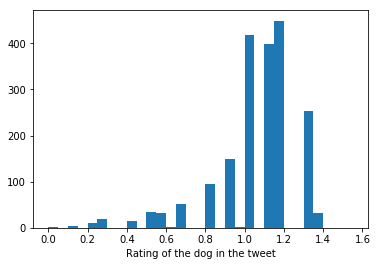

In [163]:
bin_edges = np.arange(0, twitter_archive_master['rating'].max()+0.2, 0.05)
plt.hist(data = twitter_archive_master, x = 'rating', bins = bin_edges);
plt.xlabel('Rating of the dog in the tweet');


##### so the most common ratings are 1.2 and 1, quite few have 1.3

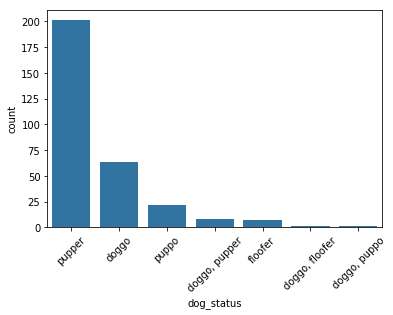

In [164]:
base_color = sn.color_palette()[0]
stat_order = twitter_archive_master.dog_status.value_counts().index
sn.countplot(data = twitter_archive_master, x = 'dog_status', color = base_color,  order = stat_order);#change color and rearrange 
plt.xticks(rotation = 45);

In [165]:
twitter_archive_master.query('dog_status == "pupper"').likes.mean()

7063.268656716418

In [166]:
twitter_archive_master.query('dog_status == "puppo"').likes.mean()

21834.81818181818

In [173]:
twitter_archive_master.query('dog_status == "doggo, puppo"').likes.mean()

46209.0

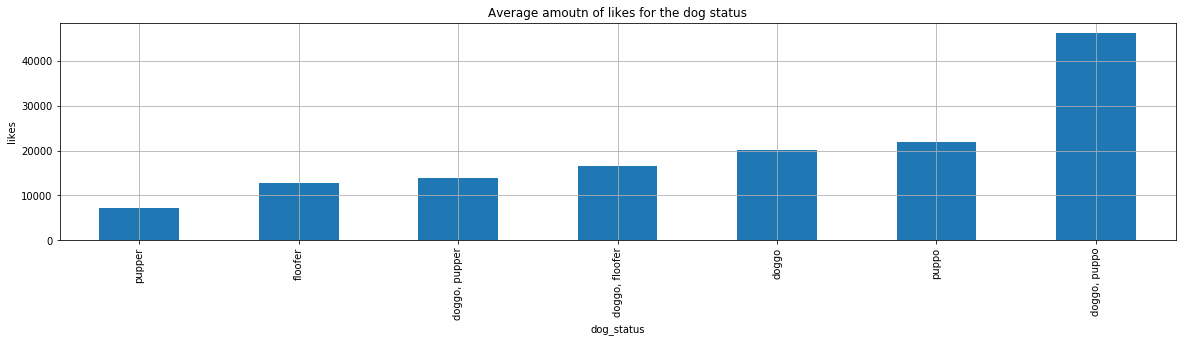

In [172]:
ax = twitter_archive_master.groupby("dog_status")['likes'].mean().sort_values().plot(kind='bar', figsize = (20,4), title = 'Average amoutn of likes for the dog status', grid = True, cmap = 'tab10')
ax.set(ylabel="likes");

##### although pupper is the most common dog status, status 'doggo,puppo' has the most likes!

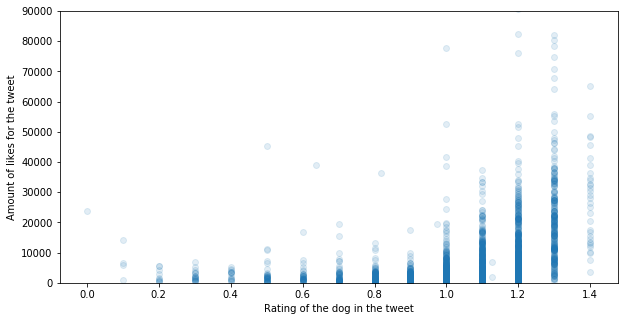

In [167]:
plt.figure(figsize = [10,5]);
plt.scatter(data = twitter_archive_master, x = 'rating', y = 'likes', alpha = 1/8)
plt.xlabel('Rating of the dog in the tweet')
plt.ylabel('Amount of likes for the tweet');
plt.ylim([0,90000]);
plt.savefig('chart.png')

##### There is a clear dependency of like on rating so we rate dogs does a good job. However one might wonder if people tend to be affected by the rating they see and prone to like those tweets more

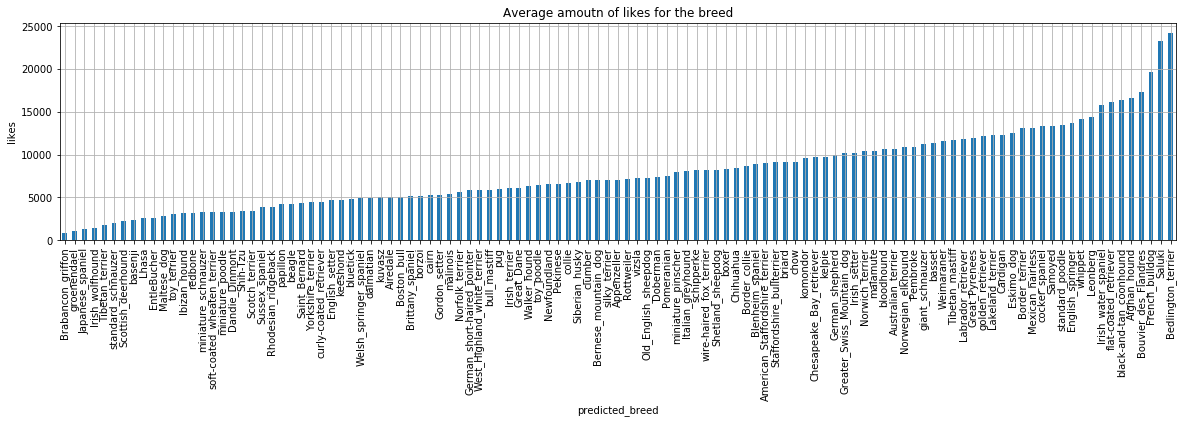

In [168]:
ax = twitter_archive_master.groupby("predicted_breed")['likes'].mean().sort_values().plot(kind='bar', figsize = (20,4), title = 'Average amoutn of likes for the breed', grid = True, cmap = 'tab10')
ax.set(ylabel="likes");

As we can see from this graph some breeds have considerably higher amount of likes. This could be a good question for futher invesitgation as we have to consider other factors as for example content of picture. 

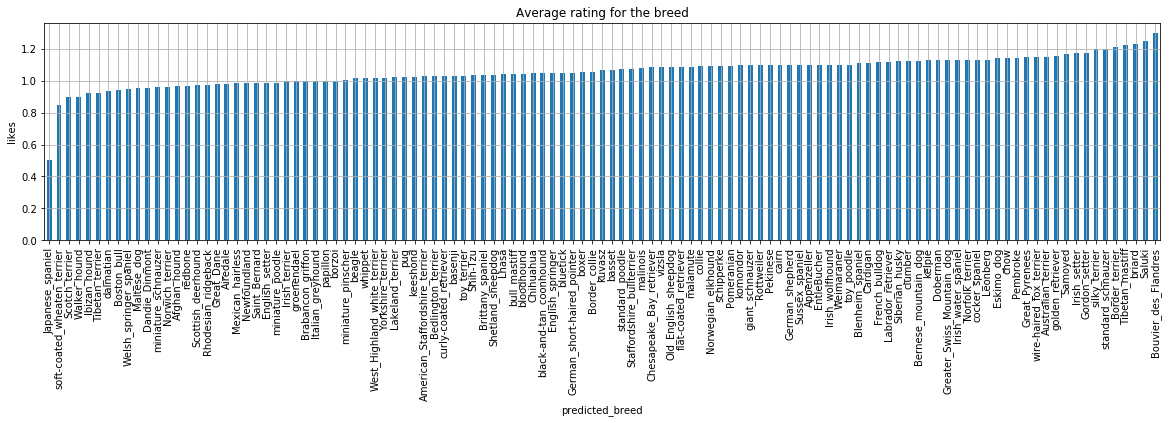

In [169]:
ax = twitter_archive_master.groupby("predicted_breed")['rating'].mean().sort_values().plot(kind='bar', figsize = (20,4), title = 'Average rating for the breed', grid = True, cmap = 'tab10')
ax.set(ylabel="likes");

From this graphs we can see that besides japanese spaniel which has a considerably lower rating ( and can be simply an outlier), most of the breed do not show any correlation for the raitng.